In [14]:
# Open a file to write a random sample to
result_file = open('random_sample.csv','w')
# Open the data file for reading
data_file = 'cleaned_and_filtered_data_full.csv'

# Set a counter to record number of lines written to new file
totlines = 0
# Set a maximum number of lines to write to new file
max_lines = 100000
# Set a downsampling factor
downsample = 100
# Open the csv
with open(data_file, "r") as f:
    count = 0
    firstline = True
    # Run through reading a line at a time
    for line in f: 
        if totlines >= max_lines:
            break
        if firstline == True:
            # Write header line
            result_file.write(line)
            firstline = False
        count += 1
        if count // downsample != 0:
            result_file.write(line)
            totlines += 1
            count = 0
print(f'{totlines} lines written to new file.')        
result_file.close()

20433 lines written to new file.


In [15]:
# Import the pandas library for reading and manipulating your data
# Anywhere you see "pd" in this notebook it's a reference to the pandas library
import pandas as pd
# Extra step to ensure that pandas plays nice with matplotlib
pd.plotting.register_matplotlib_converters()
# Import the numpy library for running calculations on your data
# Anywhere you see "np" in this notebook it's a reference to the numpy library
import numpy as np
# Import some components of the matplotlib library for plotting your data
# Anywhere you see "plt" or "mpimg" in this notebook it's a reference to the "pyplot" and "image" packages from matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Import seaborn library for making your plots pretty!
# Anywhere you see "sns" in this notebook it's a reference to the seaborn library
import seaborn as sns
# Set some default plotting parameters using seaborn
sns.set()

In [16]:
df = pd.read_csv("random_sample.csv", parse_dates=['timestamp'])
df.head()

,timestamp,plate_id,registration_state,violation_code,vehicle_body_type,vehicle_make,borough,vehicle_color,vehicle_year
0,2016-01-01 09:28:00,GRT4219,NY,FIRE HYDRANT,4DSD,DODGE,Bronx,RED,2005
1,2016-01-01 12:00:00,FFJ6825,NY,FIRE HYDRANT,SUBN,FORD,Bronx,WHITE,2003
2,2016-01-01 15:40:00,GVZ7532,NY,NO PARKING ZONE,SUBN,AUDI,Manhattan,GRAY,2015
3,2016-01-02 05:29:00,HDT2100,NY,FIRE HYDRANT,SUBN,LEXUS,Queens,BLACK,2015
4,2016-01-02 06:56:00,GYJ9916,NY,NO PARKING ZONE,4DSD,NISSA,Manhattan,GRAY,2012


In [17]:
# Parse timestamps to generate new columns
df['month'] = df.timestamp.dt.month
df['weekday'] = df.timestamp.dt.weekday_name
df['hour_of_day'] = df.timestamp.dt.hour
df['minute_of_hour'] = df.timestamp.dt.minute

In [42]:
# Count violations per minute by violation code
df_minute_counts = pd.pivot_table(df, index='minute_of_hour', 
                                  columns='violation_code', 
                                  values='timestamp', 
                                  aggfunc=len)
df_minute_counts.head()

violation_code,EXPIRED METER,FIRE HYDRANT,NO METER RECEIPT,NO PARKING ZONE,STREET CLEANING
minute_of_hour,,,,,
0,93,34,54,50,82
1,71,23,56,27,59
2,78,36,46,45,72
3,92,29,51,44,63
4,95,29,50,46,57


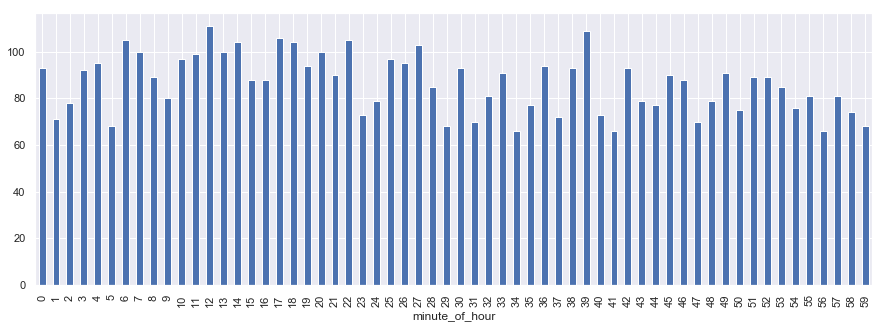

In [48]:
# Visualize for a particular violation code
plt.figure(figsize=(15, 5))
df_minute_counts['EXPIRED METER'].plot(kind='bar')
plt.show()

In [57]:
# Count violations per hour in each borough
df_hour_counts = pd.pivot_table(df, index='hour_of_day', 
                                  columns='borough', 
                                  values='timestamp', 
                                  aggfunc=len)
df_hour_counts.head()

borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
hour_of_day,,,,,
0,39.0,83.0,36.0,24.0,1.0
1,19.0,60.0,10.0,15.0,NaN
2,17.0,60.0,11.0,12.0,1.0
3,18.0,40.0,11.0,18.0,NaN
4,10.0,10.0,1.0,9.0,NaN


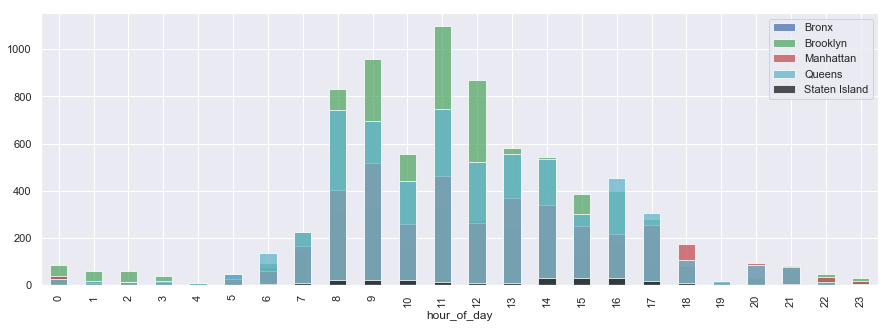

In [59]:
plt.figure(figsize=(15, 5))
colors = ['b', 'g', 'r', 'c', 'k']
for column, color in zip(df_hour_counts.columns, colors):
    df_hour_counts[column].plot(kind='bar', color=color, alpha=0.75, label=column)
plt.legend()
plt.show()

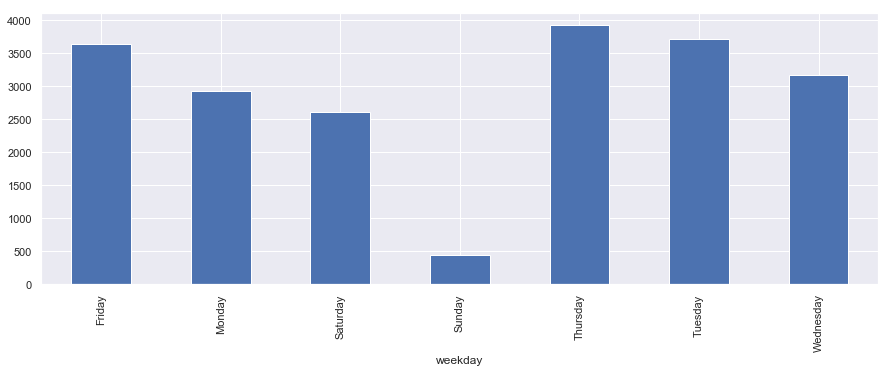

In [25]:
# Count violations per hour in each borough
df_weekday_counts = pd.pivot_table(df, index='weekday', 
                                  columns='borough', 
                                  values='timestamp', 
                                  aggfunc=len)
df_hour_counts.head()

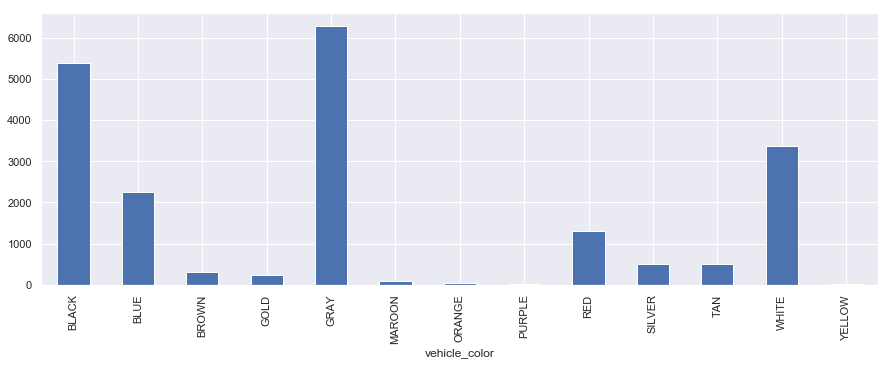

In [19]:
color_counts = df.groupby(['vehicle_color']).count()['timestamp']
plt.figure(figsize=(15, 5))
color_counts.plot(kind='bar')
plt.show()

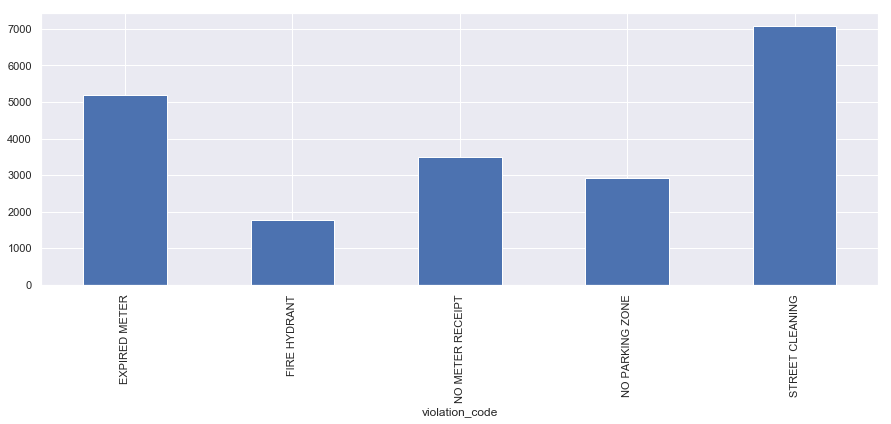

In [20]:
violation_counts = df.groupby(['violation_code']).count()['timestamp']
plt.figure(figsize=(15, 5))
violation_counts.plot(kind='bar')
plt.show()

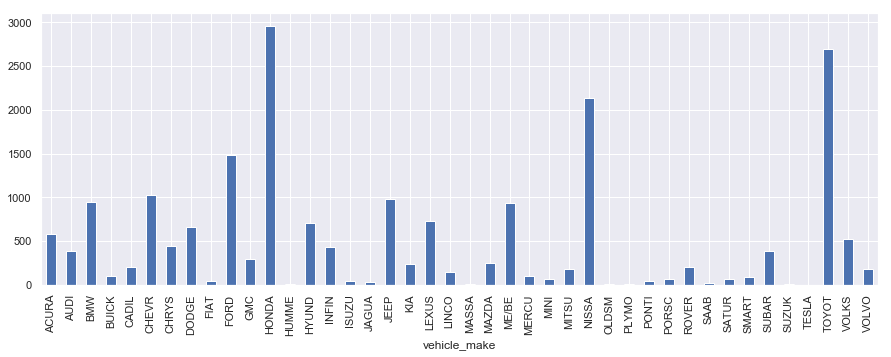

In [21]:
vehicle_counts = df.groupby(['vehicle_make']).count()['timestamp']
plt.figure(figsize=(15, 5))
vehicle_counts.plot(kind='bar')
plt.show()

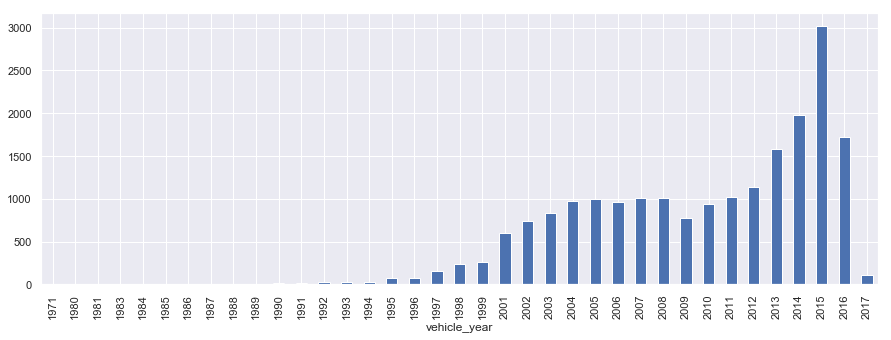

In [22]:
vehicle_year_counts = df.groupby(['vehicle_year']).count()['timestamp']
plt.figure(figsize=(15, 5))
vehicle_year_counts.plot(kind='bar')
plt.show()